# Predictiong the likely hood of Surviving in Titantic shipwreak
this notebook will use python-based Machine learning models to predict whether a passenger servivides the shipwreck or not.

## 1. Problem Definition:
> given a passenger features, can we predict wheter a passenger can survive the titanic shipwreck or not ? 

## 2. Data.
the original data came from kaggle look at for more info URL:https://www.kaggle.com/competitions/titanic/data
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


## 3. Evalution
the evalution matrice for this problem is going to be accuracy: which is going to correct predicted fining of passengers.

## 4. Features:
Kaggle provides a data dictory detailing what each feature means, those can be found in the URL:
https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### first lets discover our data and try to find some relastionships and even use confusion matrix to discover it.

In [33]:
df = pd.read_csv("./data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### survivied is the class i am trying to predict in this case

let's compare sex and survivially of passengers.

In [36]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [39]:
df.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:>

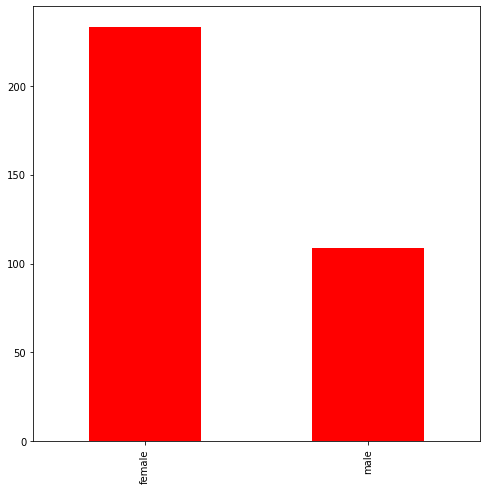

In [43]:
fig,ax = plt.subplots(figsize = (8,8))
group['Sex'].value_counts().plot(kind='bar', ax=ax, color="red", label="Survived")

In [45]:
countsSex = df.groupby('Survived')['Sex'].value_counts().unstack()

In [50]:
countsSex

Sex,female,male
Survived,,
0,81,468
1,233,109


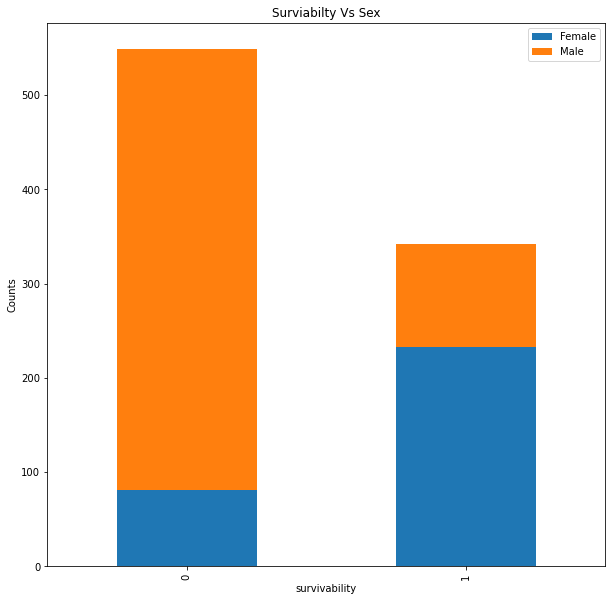

In [54]:
fig,ax = plt.subplots(figsize = (10,10))
countsSex.plot(kind = "bar", stacked = True,ax = ax)
ax.set(title= "Surviabilty Vs Sex", xlabel = "survivability", ylabel ="Counts")
plt.legend(["Female", "Male"])
plt.show()

##### We can see that females are more likely to survive the titanicy sinking

### now let's fix our data and put all in numbers to train it into a model

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
df_tmp = df.copy()

lets fill up the data that is numberic with medium

In [59]:
# filling numbers 
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # check for null values of numberic
            # add binary column which tells us whether that data actually missing
            df_tmp[label + "is_missing"] = pd.isnull(content)
            # fill missing numebric data 
            df_tmp[label] = content.fillna(content.median)

##### now if the data is not numberic we are going to fill with with its code but also we are going to add a codes for that NaN value

In [62]:
# fill non numberic data and put non numebric data into discrete data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a colum showing we have data missing in a certain column
        df_tmp[label+"is_missing"] = pd.isnull(content)
        # now put tat data into categorical order and add a 1 to it
        df_tmp[label] = pd.Categorical(content).codes+1

In [71]:
for label, content in df_tmp.items():
    if label.find("is_missing") != -1:
        df_tmp[label] = df_tmp[label].astype("category").cat.codes

In [166]:
### lets make a function that fixes our data to be used for train and test set

def preprocess_data(df):
    """
    this functions returns a dataframe that fixes the data.
    it will deal with missing values in our data and convert non-numeric values to be numeric
    """
    df_tmp = df.copy()
    
    if "Survived" in df_tmp.columns:
        df_tmp.drop("Survived",axis = 1 , inplace = True)
    # filling numbers 
    for label,content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            # add binary column which tells us whether that data actually missing
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            if pd.isnull(content).sum(): # check for null values of numberic
                # fill missing numebric data 
                df_tmp[label] = content.fillna(content.median())
            print(label)
        else:
            # add a colum showing we have data missing in a certain column
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # now put tat data into categorical order and add a 1 to it
            df_tmp[label] = pd.Categorical(content).codes+1
    
    for label, content in df_tmp.items():
        if label.find("_is_missing") != -1:
            df_tmp[label] = df_tmp[label].astype("category").cat.codes
    
    ## return the fixed dataFrame
    return df_tmp
    

In [160]:
df_tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Ageis_missing',
       'Nameis_missing', 'Sexis_missing', 'Ticketis_missing',
       'Cabinis_missing', 'Embarkedis_missing'],
      dtype='object')

### now that we have got our data ready let's split it into test and traingset


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(df_tmp.drop("Survived",axis = 1),df_tmp["Survived"],test_size = 0.2)

now that we've got our data splited into train and test set lets try to put in it into our model

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [80]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [82]:
score= accuracy_score(y_test,y_pred)
score

0.8156424581005587

now lets use grid serach cv and make some hyperparameter tuning. 



In [86]:
%%time
from sklearn.model_selection import GridSearchCV
rf_grid = {
    "n_estimators":np.arange(10,200,10),
    "max_depth":[None,3,5,10],
    "min_samples_split": np.arange(2,10,2)
}
rc_model = GridSearchCV(RandomForestClassifier(n_jobs = -1,
                                              random_state = 42),param_grid = rf_grid,
                       cv = 5,
                       verbose = True)
rc_model.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 30.2 s
Wall time: 33.6 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=True)

In [87]:
rc_model.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 40}

In [94]:
y_pred = rc_model.predict(x_test)
len(y_pred), len(y_test)

(179, 179)

In [95]:
score = accuracy_score(y_test,y_pred)
score

0.7988826815642458

In [100]:
%%time
### Now lets use RandsomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                    random_state = 42),
                             param_distributions=rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)
# now fit our model 
rs_model.fit(x_train,y_train)

C:\Users\Al Abdali\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 29.8 s
Wall time: 29 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([2, 4]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [99]:
accuracy_score(y_test,rs_model.predict(x_test))

0.7988826815642458

In [174]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
x_train,y_train = preprocess_data(train),train["Survived"]
fixed_test = preprocess_data(test)
x_train["Survived"] = y_train
fixed_train = x_train

PassengerId
Pclass
Age
SibSp
Parch
Fare
PassengerId
Pclass
Age
SibSp
Parch
Fare


In [144]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [171]:
fixed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Name                    418 non-null    int16  
 3   Sex                     418 non-null    int8   
 4   Age                     418 non-null    float64
 5   SibSp                   418 non-null    int64  
 6   Parch                   418 non-null    int64  
 7   Ticket                  418 non-null    int16  
 8   Fare                    418 non-null    float64
 9   Cabin                   418 non-null    int8   
 10  Embarked                418 non-null    int8   
 11  PassengerId_is_missing  418 non-null    int8   
 12  Pclass_is_missing       418 non-null    int8   
 13  Name_is_missing         418 non-null    int8   
 14  Sex_is_missing          418 non-null    in

In [173]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Pclass                  891 non-null    int64  
 2   Name                    891 non-null    int16  
 3   Sex                     891 non-null    int8   
 4   Age                     891 non-null    float64
 5   SibSp                   891 non-null    int64  
 6   Parch                   891 non-null    int64  
 7   Ticket                  891 non-null    int16  
 8   Fare                    891 non-null    float64
 9   Cabin                   891 non-null    int16  
 10  Embarked                891 non-null    int8   
 11  PassengerId_is_missing  891 non-null    int8   
 12  Pclass_is_missing       891 non-null    int8   
 13  Name_is_missing         891 non-null    int8   
 14  Sex_is_missing          891 non-null    in

### lets define a function that finds the best paramters to be used in the model so we can submit our model


In [175]:
def get_model_best_model(data,parameters,n_iter,cv = 5):
    x_train,x_test,y_train, y_test = train_test_split(data.drop("Survived", axis =1), data["Survived"], test_size = 0.2)
    rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                    random_state = 42),
                             param_distributions=parameters,
                             n_iter = 100,
                             cv = cv,
                             verbose = True)
    # now fit our model 
    rs_model.fit(x_train,y_train)
    print("Our models Accuracy is {}".format(predict_and_evaluate_model(rs_model,x_test,y_test)))
    return rs_model
    

In [113]:
fixed_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nameis_missing,Sexis_missing,Ageis_missing,Ticketis_missing,Fareis_missing,Cabinis_missing,Embarkedis_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,0,0,0,0,0,1,0
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,0,0,0,0,0,1,0
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,0,0,0,0,0,1,0
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,0,0,0,0,0,1,0
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,0,0,1,0,0,1,0
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,0,0,0,0,0,0,0
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,0,0,0,0,0,1,0
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,0,0,1,0,0,1,0


In [140]:
test.Fare.isna().sum()

1

In [141]:
train.Fare.isna().sum()

0

In [111]:
def predict_and_evaluate_model(model,x_test,y_test):
    return accuracy_score(y_test,model.predict(x_test))


In [176]:
%%time
from scipy.stats import randint
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt']
}

model = get_model_best_model(fixed_train,param_distributions,n_iter=50)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Our models Accuracy is 0.8268156424581006
CPU times: total: 4min 51s
Wall time: 4min 57s


In [177]:
model.best_params_

{'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 959}

In [132]:
fixed_train.drop("Survived", axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Name                891 non-null    int16  
 3   Sex                 891 non-null    int8   
 4   Age                 891 non-null    float64
 5   SibSp               891 non-null    int64  
 6   Parch               891 non-null    int64  
 7   Ticket              891 non-null    int16  
 8   Fare                891 non-null    float64
 9   Cabin               891 non-null    int16  
 10  Embarked            891 non-null    int8   
 11  Nameis_missing      891 non-null    int8   
 12  Sexis_missing       891 non-null    int8   
 13  Ageis_missing       891 non-null    int8   
 14  Ticketis_missing    891 non-null    int8   
 15  Cabinis_missing     891 non-null    int8   
 16  Embarked

In [129]:
fixed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    int16  
 3   Sex                 418 non-null    int8   
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    int16  
 8   Fare                418 non-null    float64
 9   Cabin               418 non-null    int8   
 10  Embarked            418 non-null    int8   
 11  Nameis_missing      418 non-null    int8   
 12  Sexis_missing       418 non-null    int8   
 13  Ageis_missing       418 non-null    int8   
 14  Ticketis_missing    418 non-null    int8   
 15  Fareis_missing      418 non-null    int8   
 16  Cabinis_

In [178]:
opt_model = RandomForestClassifier(n_jobs = -1,
                                  n_estimators = 959
                                  ,max_features = 'sqrt',
                                  min_samples_leaf=1,
                                  min_samples_split=3)
opt_model.fit(fixed_train.drop("Survived", axis = 1), fixed_train["Survived"])
opt_model_y_pred = opt_model.predict(fixed_test)

In [183]:
resulted_df = pd.DataFrame({"PassengerId":fixed_test["PassengerId"],
                           "Survived":opt_model_y_pred})

In [185]:
resulted_df.to_csv("Titanic_Survival_predctions.csv",index = False)